## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category= UserWarning)
%matplotlib inline
plt.style.use('dark_background')

## Load the dataset.

In [5]:
health = pd.read_csv("healthcare-dataset-stroke-data.csv")
health.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Get familiar with the dataset

In [8]:
# Check the data types
health.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
# Check the number of rows and columns
health.shape

(5110, 12)

In [12]:
health.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [14]:
# Check the summary statistics
health.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Clean the Data

In [17]:
# remove all duplicated values

health.duplicated().sum()

0

In [19]:
health.rename(columns = {"id":"ID","gender":"Gender","age":"Age","hypertension":"Hypertension","heart_disease":"Heart Disease",
                     "ever_married":"Ever Married","work_type":"Work Type","Residence_type":"Residence Type","avg_glucose_level":"Average Glucose Level",
                     "bmi":"Body Mass Index","smoking_status":"Smoking Status","stroke":"Stroke"},inplace = True)

In [21]:
skewness = health['Body Mass Index'].skew()
print(f"Skewness of BMI: {skewness}")

Skewness of BMI: 1.0553402052962912


In [23]:
## I have replaced the Null Values in the BMI with a median value of based on the age group as data is skewed here .
health['Body Mass Index'] = health['Body Mass Index'].fillna(
    health.groupby(pd.cut(health['Age'], bins=[0, 18, 35, 55, 120]))['Body Mass Index'].transform('median')
)

In [25]:
# Convert 'hypertension' column to "Yes" for 1 and "No" for 0
health['Hypertension'] = health['Hypertension'].map({1: 'Yes', 0: 'No'})
health.head()

,ID,Gender,Age,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,Body Mass Index,Smoking Status,Stroke
0,9046,Male,67.0,No,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,No,0,Yes,Self-employed,Rural,202.21,29.5,never smoked,1
2,31112,Male,80.0,No,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,No,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,Yes,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
health = health.astype({"Age":"int"})

In [29]:
health = health[(health['Age'] >= 1)]
health['Age'].unique()

array([67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 54, 50, 64, 75, 60, 57, 71,
       52, 82, 65, 58, 42, 48, 72, 63, 76, 39, 77, 73, 56, 45, 70, 66, 51,
       43, 68, 47, 53, 38, 55,  1, 46, 32, 14,  3,  8, 37, 40, 35, 20, 44,
       25, 27, 23, 17, 13,  4, 16, 22, 30, 29, 11, 21, 18, 33, 24, 34, 36,
       41,  5, 26, 31,  7, 12, 62,  2,  9, 15, 28, 10, 19,  6])

In [31]:
health.dtypes

ID                         int64
Gender                    object
Age                        int32
Hypertension              object
Heart Disease              int64
Ever Married              object
Work Type                 object
Residence Type            object
Average Glucose Level    float64
Body Mass Index          float64
Smoking Status            object
Stroke                     int64
dtype: object

## Data Exploration(EDA)

In [34]:
# how many patient have stroke in the dataset? ANS = 249
stroke_count = health['Stroke'].value_counts()
stroke_count

Stroke
0    4818
1     249
Name: count, dtype: int64

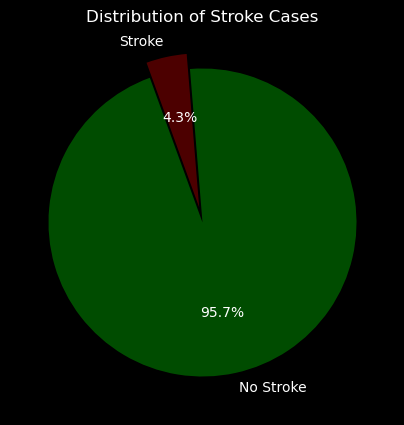

In [36]:
# Data for the pie chart
import matplotlib.pyplot as plt

stroke_count = [4700, 209]
labels = ['No Stroke', 'Stroke']
colors = [(0, 1, 0, 0.3), (1, 0, 0, 0.3)]  # Reduced alpha to 0.5 for more transparency

plt.style.use('dark_background')
plt.figure(figsize=(5, 5))
plt.pie(stroke_count, labels=labels, autopct='%1.1f%%',
        startangle=110, colors=colors, explode=[0, 0.1])
plt.title("Distribution of Stroke Cases")
plt.show()


## Question 1: What's the relationship between marriage and stroke?

In [39]:
# count the number of people who are either married or unmarried
health['Ever Married'].value_counts().reset_index()

,Ever Married,count
0,Yes,3353
1,No,1714


In [41]:
# Since there are more married people in the dataset, 
#we will calculate the stroke rate based on each category of marriage.
ever_married_stroke_rate = health.groupby('Ever Married')['Stroke'].mean()
ever_married_stroke_rate

Ever Married
No     0.016919
Yes    0.065613
Name: Stroke, dtype: float64

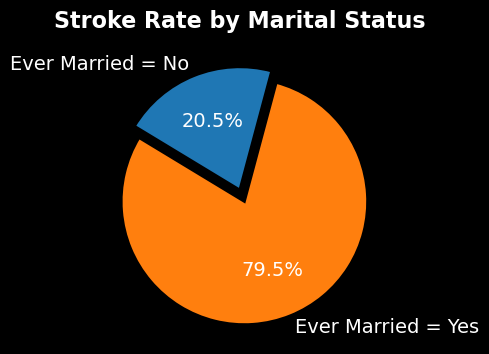

In [43]:
# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.style.use('dark_background')
colors = ['#1f77b4', '#ff7f0e']
wedgeprops = {'linewidth': 2, 'edgecolor': 'black'}

plt.pie(ever_married_stroke_rate, labels=['Ever Married = No', 'Ever Married = Yes'], 
        autopct='%1.1f%%', startangle=75, colors=colors, explode=[0, 0.1],
        textprops={'fontsize': 14, 'color': 'white'},
        wedgeprops=wedgeprops)

plt.title('Stroke Rate by Marital Status', fontsize=16, fontweight='bold', color='white')

plt.show()


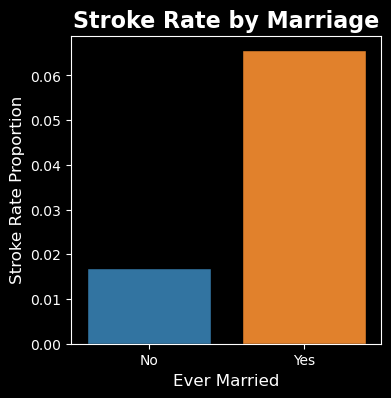

In [45]:
#Relationship between Ever married and stroke 
plt.figure(figsize=(4, 4))
plt.style.use('dark_background')

sns.barplot(x=ever_married_stroke_rate.index,
            y=ever_married_stroke_rate.values,
            palette=['#1f77b4', '#ff7f0e'],
            edgecolor='black')

plt.title('Stroke Rate by Marriage', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Ever Married', fontsize=12, color='white')
plt.ylabel('Stroke Rate Proportion', fontsize=12, color='white')

plt.xticks(color='white')
plt.yticks(color='white')

plt.show()


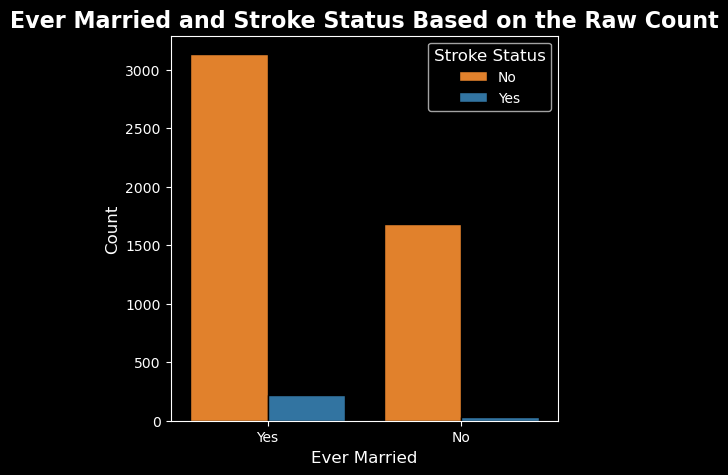

In [47]:
# A direct count of stroke cases also shows a similar trend, but it may not be as accurate
#given that the dataset contains a larger number of married people. 
plt.figure(figsize=(5, 5))
plt.style.use('dark_background')

sns.countplot(data=health, x='Ever Married',
              palette=['#ff7f0e', '#1f77b4'], hue='Stroke',
              edgecolor='black')

plt.title('Ever Married and Stroke Status Based on the Raw Count', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Ever Married', fontsize=12, color='white')
plt.ylabel('Count', fontsize=12, color='white')

plt.xticks(color='white')
plt.yticks(color='white')

plt.legend(title='Stroke Status', labels=['No', 'Yes'], title_fontsize='12', fontsize='10', loc='upper right')

plt.show()


## Question 2: What's the relationship between gender and stroke?

In [50]:
# count the number of  male and female
health['Gender'].value_counts().reset_index()

,Gender,count
0,Female,2979
1,Male,2087
2,Other,1


In [52]:
# Since there are more female individual in the dataset, we will calculate the stroke rate based on gender. 

gender_stroke_rate = health.groupby('Gender')['Stroke'].mean()
gender_stroke_rate

Gender
Female    0.047331
Male      0.051749
Other     0.000000
Name: Stroke, dtype: float64

In [54]:
stroke_count_by_gender = gender_stroke_rate *health['Gender'].value_counts()
stroke_count_by_gender 

Gender
Female    141.0
Male      108.0
Other       0.0
dtype: float64

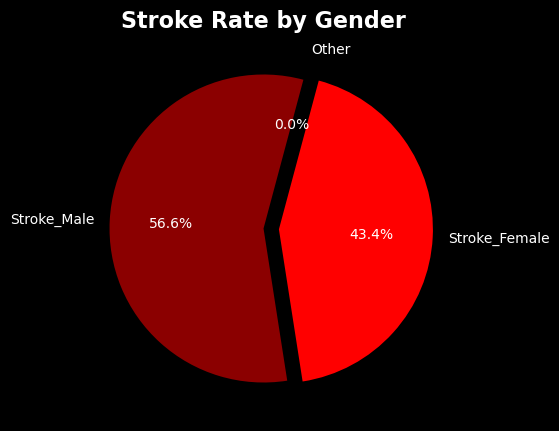

In [56]:
plt.figure(figsize=(5, 5))
plt.style.use('dark_background')

plt.pie(stroke_count_by_gender,
        labels=['Stroke_Male', 'Stroke_Female', 'Other'],
        autopct='%1.1f%%', startangle=75,
        colors=['#8B0000', '#FF0000', '#FFC0C0'],
        explode=[0, 0.1, 0.1])

plt.title('Stroke Rate by Gender', fontsize=16, fontweight='bold', color='white')
plt.show()


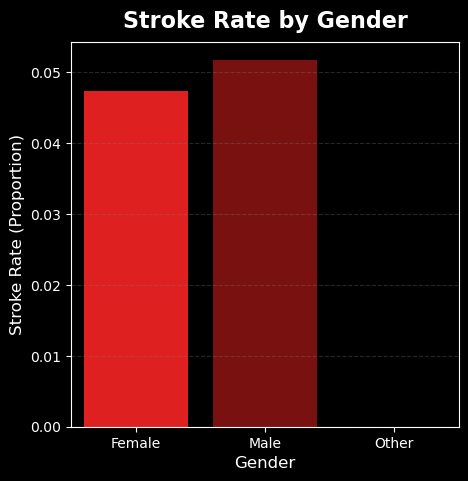

In [58]:
# Relationship between gender and stroke 
plt.figure(figsize=(5, 5))  
plt.style.use('dark_background')

sns.barplot(x=gender_stroke_rate.index, y=gender_stroke_rate.values,
            palette=['#FF0000', '#8B0000'])

plt.title('Stroke Rate by Gender', 
          fontsize=16, fontweight='bold', pad=10, color='white')
plt.xlabel('Gender', fontsize=12, color='white')
plt.ylabel('Stroke Rate (Proportion)', fontsize=12, color='white')

plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')

plt.grid(axis='y', color='gray', linestyle='--', alpha=0.3)

plt.show()


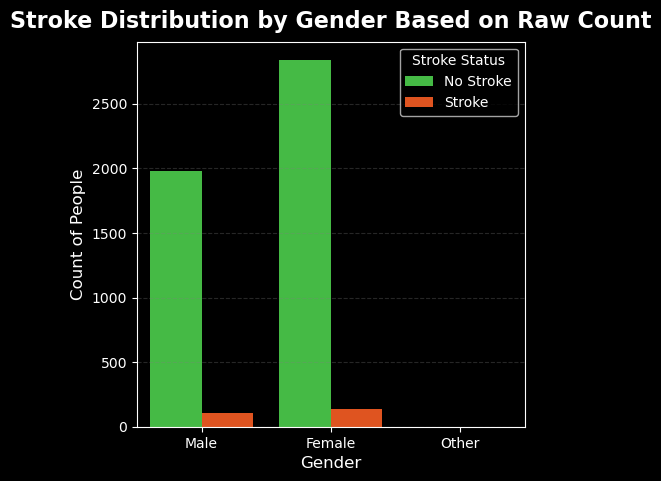

In [60]:
# A direct count of stroke cases also shows a similar trend, but it may not be as accurate
#given that the dataset contains a larger number of Female
plt.figure(figsize=(5, 5))  
plt.style.use('dark_background')

sns.countplot(data=health, x='Gender', hue='Stroke',
              palette=['#32CD32', '#FF4500'])

plt.title('Stroke Distribution by Gender Based on Raw Count', 
          fontsize=16, fontweight='bold', pad=10, color='white')
plt.xlabel('Gender', fontsize=12, color='white')
plt.ylabel('Count of People', fontsize=12, color='white')

plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')

plt.legend(title='Stroke Status', labels=['No Stroke', 'Stroke'], fontsize=10, loc='upper right')

plt.grid(axis='y', color='gray', linestyle='--', alpha=0.3)

plt.show()


## Question 3: Is age a risk factor for stroke?

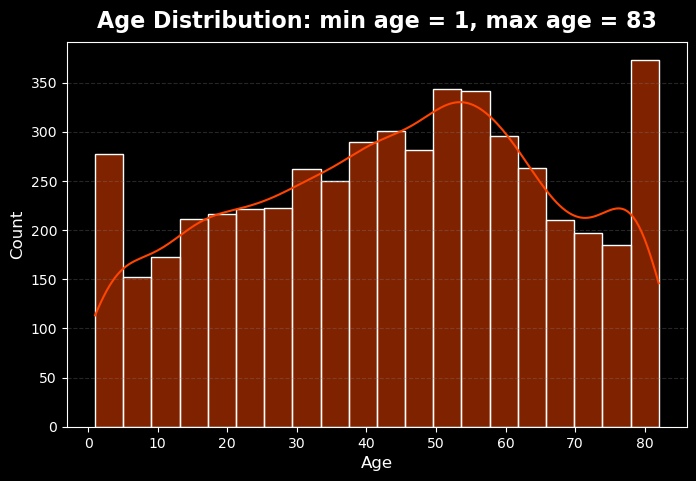

In [63]:
# Lets check the age distribution
plt.figure(figsize=(8, 5))  
plt.style.use('dark_background')

sns.histplot(health['Age'], kde=True, color='#FF4500', edgecolor='white')

plt.title('Age Distribution: min age = 1, max age = 83', 
          fontsize=16, fontweight='bold', pad=10, color='white')
plt.xlabel('Age', fontsize=12, color='white')
plt.ylabel('Count', fontsize=12, color='white')

plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')

plt.grid(axis='y', color='gray', linestyle='--', alpha=0.3)

plt.show()


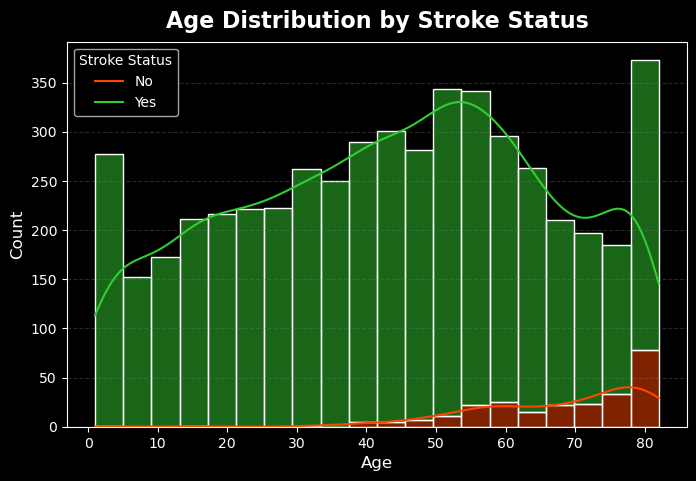

In [64]:
# Relationship between age and stroke
plt.figure(figsize=(8, 5))  
plt.style.use('dark_background')

sns.histplot(health, x='Age', hue='Stroke', 
             multiple='stack', palette=['#32CD32', '#FF4500'], kde=True)

plt.title('Age Distribution by Stroke Status', 
          fontsize=16, fontweight='bold', pad=10, color='white')
plt.xlabel('Age', fontsize=12, color='white')
plt.ylabel('Count', fontsize=12, color='white')

plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')

plt.legend(title='Stroke Status', labels=['No', 'Yes'], fontsize=10)

plt.grid(axis='y', color='gray', linestyle='--', alpha=0.3)

plt.show()


In [66]:
# Create age groups
health['Age Group'] = pd.cut(health['Age'],
                                  bins=[0, 40, 60, 80, 100], 
                                  labels=['<40', '40-60', '60-80', '80+'])
health['Age Group']

0       60-80
1       60-80
2       60-80
3       40-60
4       60-80
        ...  
5105    60-80
5106      80+
5107      <40
5108    40-60
5109    40-60
Name: Age Group, Length: 5067, dtype: category
Categories (4, object): ['<40' < '40-60' < '60-80' < '80+']

In [69]:
# Calculate stroke rate by age group and gender
age_stroke_rate = health.groupby('Age Group')['Stroke'].mean().reset_index()
age_stroke_rate

,Age Group,Stroke
0,<40,0.003635
1,40-60,0.040973
2,60-80,0.129630
3,80+,0.198276


<Figure size 800x500 with 0 Axes>

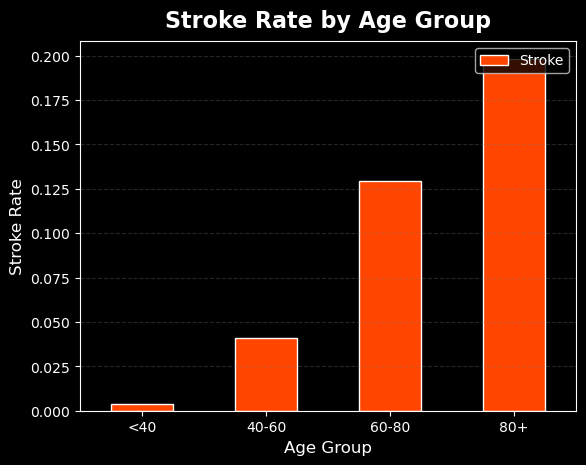

In [71]:
# Plot the stroke rate by age group and gender
plt.figure(figsize=(8, 5))  
plt.style.use('dark_background')

age_stroke_rate.plot(kind='bar', x='Age Group', stacked=True, color='#FF4500', edgecolor='white')

plt.title('Stroke Rate by Age Group', 
          fontsize=16, fontweight='bold', pad=10, color='white')
plt.xlabel('Age Group', fontsize=12, color='white')
plt.ylabel('Stroke Rate', fontsize=12, color='white')

plt.xticks(rotation=0, fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')

plt.legend(['Stroke'], fontsize=10, loc='upper right')

plt.grid(axis='y', color='gray', linestyle='--', alpha=0.3)

plt.show()


## Question 4: What's the relationship between Hypertension and Stroke?

In [74]:
health['Hypertension'].value_counts().reset_index()

,Hypertension,count
0,No,4569
1,Yes,498


In [76]:
stroke_rate_hypertension = health.groupby('Hypertension')['Stroke'].mean()
stroke_rate_hypertension

Hypertension
No     0.040053
Yes    0.132530
Name: Stroke, dtype: float64

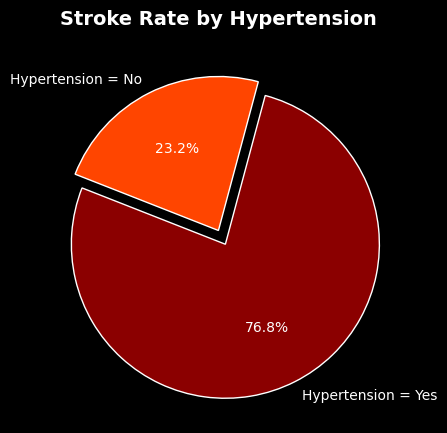

In [78]:
# Plotting the pie chart
plt.figure(figsize=(5, 5))  
plt.pie(stroke_rate_hypertension,
        labels=['Hypertension = No', 'Hypertension = Yes'],
        autopct='%1.1f%%', startangle=75,
        colors=['#FF4500', '#8B0000'], explode=[0, 0.1],
        wedgeprops={'edgecolor': 'white'})  

plt.title('Stroke Rate by Hypertension', 
          fontsize=14, fontweight='bold', pad=10, color='white')

plt.show()


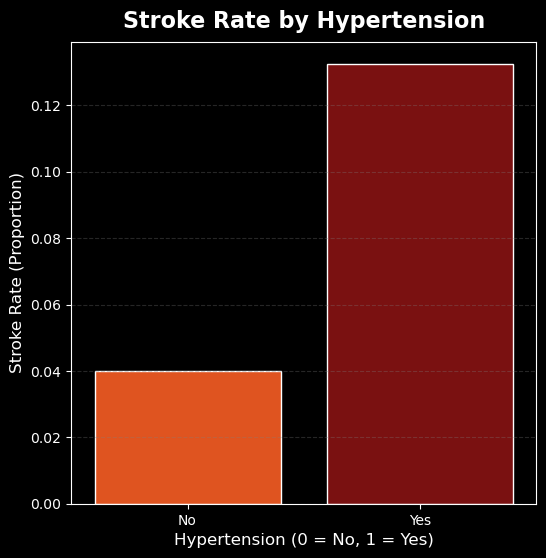

In [80]:
plt.figure(figsize=(6, 6))  
plt.style.use('dark_background')

sns.barplot(x=stroke_rate_hypertension.index,
            y=stroke_rate_hypertension.values,
            palette=['#FF4500', '#8B0000'], edgecolor='white')  

plt.title('Stroke Rate by Hypertension', 
          fontsize=16, fontweight='bold', pad=10, color='white')
plt.xlabel('Hypertension (0 = No, 1 = Yes)', fontsize=12, color='white')
plt.ylabel('Stroke Rate (Proportion)', fontsize=12, color='white')

plt.grid(axis='y', color='gray', linestyle='--', alpha=0.3)  

plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')

plt.show()


## Q.Can heart disease increase the rate of stroke?

In [83]:
health['Heart Disease'].value_counts().reset_index()

,Heart Disease,count
0,0,4791
1,1,276


In [85]:
stroke_rate_disease = health.groupby('Heart Disease')['Stroke'].mean()
stroke_rate_disease

Heart Disease
0    0.042162
1    0.170290
Name: Stroke, dtype: float64

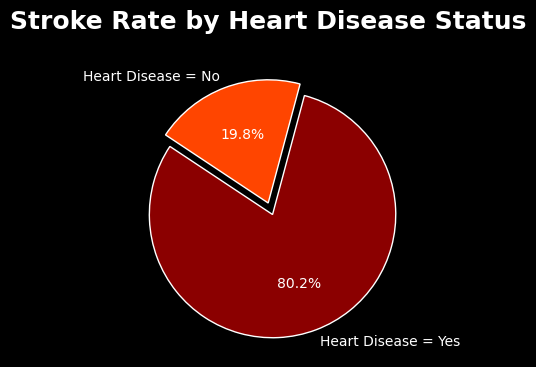

In [87]:
# Plotting the pie chart
plt.figure(figsize=(4, 4))  
plt.style.use('dark_background')

plt.pie(stroke_rate_disease,
        labels=['Heart Disease = No', 'Heart Disease = Yes'],
        autopct='%1.1f%%', startangle=75,
        colors=['#FF4500', '#8B0000'], explode=[0, 0.1],
        wedgeprops={'edgecolor': 'white'})  

plt.title('Stroke Rate by Heart Disease Status', 
          fontsize=18, fontweight='bold', pad=15, color='white')

plt.show()


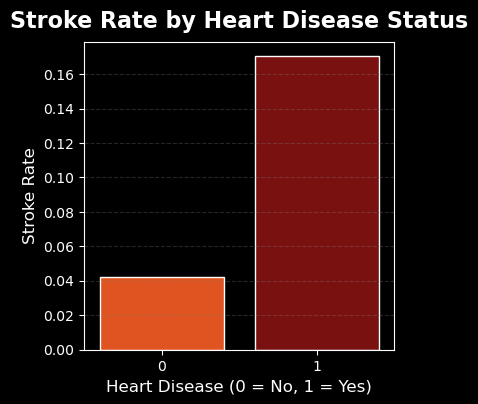

In [89]:
# Plot stroke rate by heart disease status
plt.figure(figsize=(4, 4))  
plt.style.use('dark_background')

sns.barplot(x=stroke_rate_disease.index,
            y=stroke_rate_disease.values,
            palette=['#FF4500', '#8B0000'], edgecolor='white')  

plt.title('Stroke Rate by Heart Disease Status', 
          fontsize=16, fontweight='bold', pad=10, color='white')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)', fontsize=12, color='white')
plt.ylabel('Stroke Rate', fontsize=12, color='white')

plt.grid(axis='y', color='gray', linestyle='--', alpha=0.3)  

plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')

plt.show()



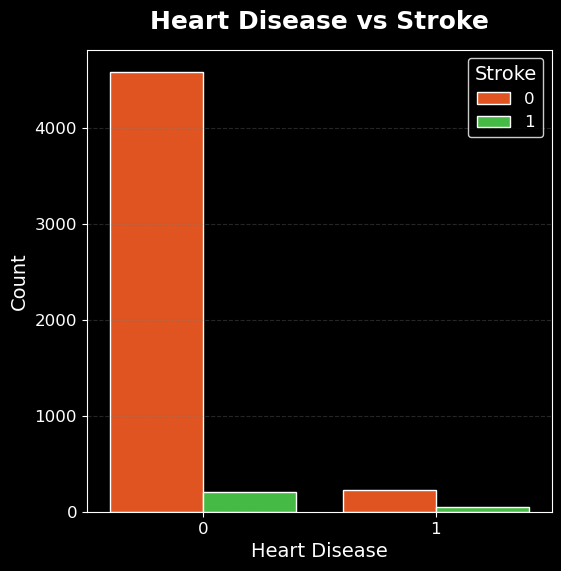

In [91]:
# Heart Disease vs Stroke
plt.figure(figsize=(6, 6))  
plt.style.use('dark_background')

sns.countplot(data=health, x='Heart Disease',
              palette=['#FF4500', '#32CD32'], hue='Stroke',
              edgecolor='white')  

plt.title("Heart Disease vs Stroke", 
          fontsize=18, fontweight='bold', pad=15, color='white')
plt.xlabel('Heart Disease', fontsize=14, color='white')
plt.ylabel('Count', fontsize=14, color='white')

plt.grid(axis='y', color='gray', linestyle='--', alpha=0.3)  

plt.legend(title='Stroke', fontsize=12, title_fontsize=14, loc='upper right',
           facecolor='black', edgecolor='white')

plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

plt.show()


## Q.Can smoking increase the rate of stroke?

In [94]:
# lets check the count of smoking status from the raw dataset

health['Smoking Status'].value_counts().reset_index()

,Smoking Status,count
0,never smoked,1892
1,Unknown,1501
2,formerly smoked,885
3,smokes,789


In [96]:
# Since more individuals have never smoked in the dataset,  we will calculate the stroke rate as an average across each smoking 
# category to account for this imbalance 

stroke_rate_smoking = health.groupby('Smoking Status')['Stroke'].mean()
stroke_rate_smoking

Smoking Status
Unknown            0.031312
formerly smoked    0.079096
never smoked       0.047569
smokes             0.053232
Name: Stroke, dtype: float64

In [98]:
smoking_status_data = {
    'smoking_status': ['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
    'stroke_rate': [0.019555, 0.068100, 0.045356, 0.052917]}
smoking_status_data

{'smoking_status': ['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
 'stroke_rate': [0.019555, 0.0681, 0.045356, 0.052917]}

In [100]:
# Create a DataFrame 
smoking_group = pd.DataFrame(smoking_status_data)
smoking_group

,smoking_status,stroke_rate
0,Unknown,0.019555
1,formerly smoked,0.068100
2,never smoked,0.045356
3,smokes,0.052917


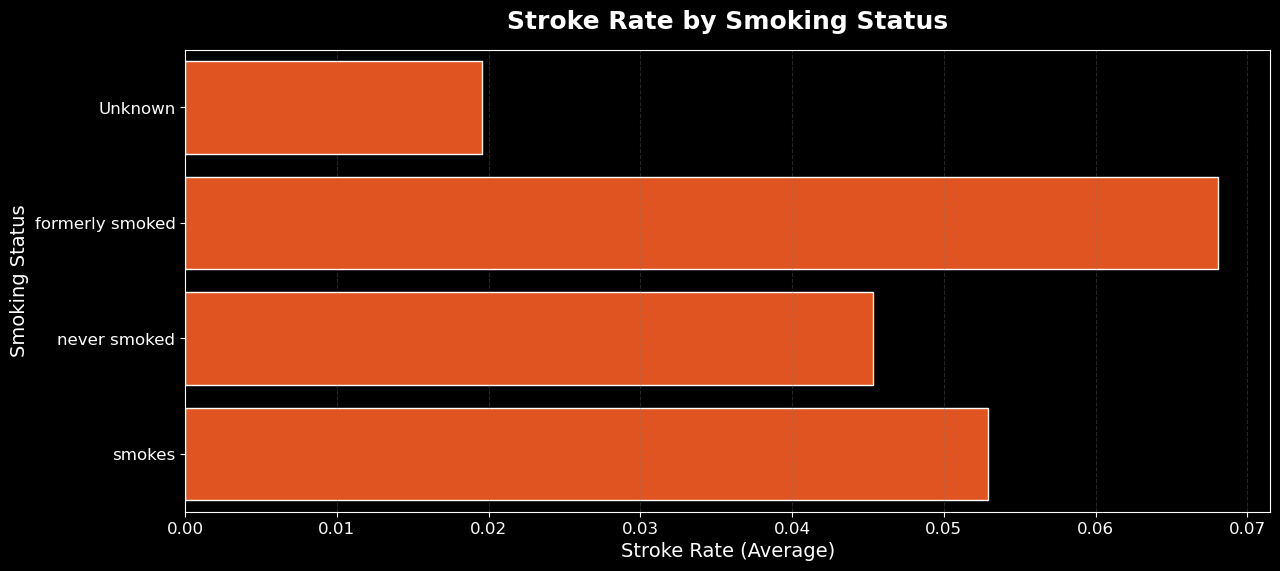

In [102]:
# Plotting the data
plt.figure(figsize=(14, 6))  
plt.style.use('dark_background')

sns.barplot(data=smoking_group, y='smoking_status',
            x='stroke_rate', color='#FF4500', edgecolor='white')  

plt.title('Stroke Rate by Smoking Status', 
          fontsize=18, fontweight='bold', pad=15, color='white')
plt.xlabel('Stroke Rate (Average)', fontsize=14, color='white')
plt.ylabel('Smoking Status', fontsize=14, color='white')

plt.grid(axis='x', color='gray', linestyle='--', alpha=0.3)  

plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

plt.show()


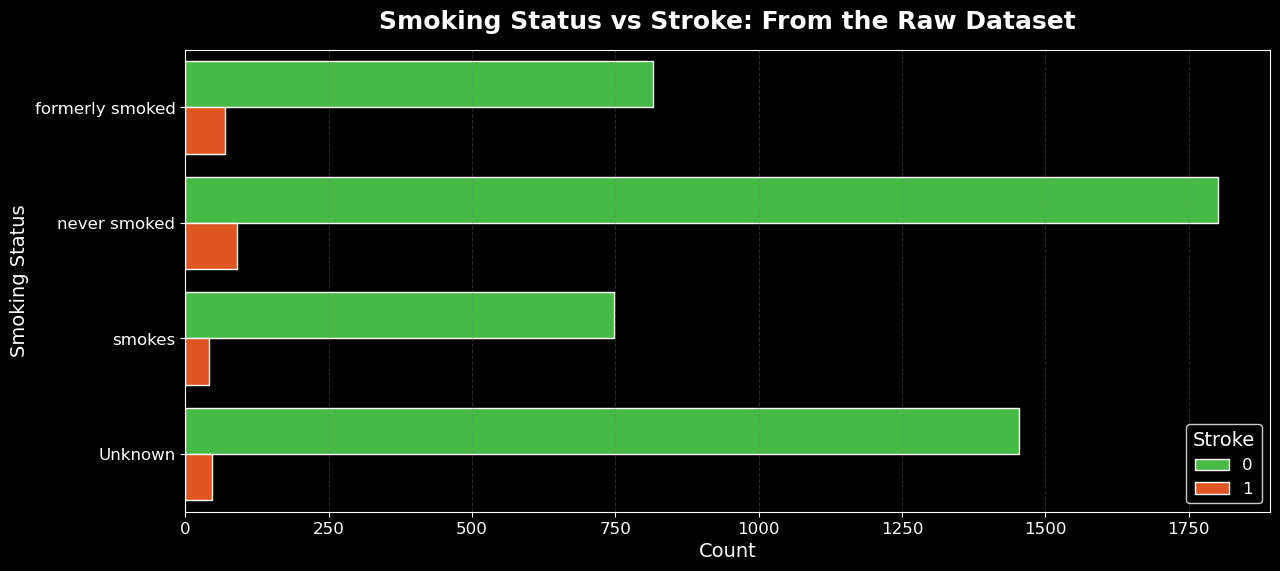

In [103]:
# A direct count of stroke cases per smoke status dont show a similar trend because the dataset contains a larger number of individuals without heart disease

plt.figure(figsize=(14, 6))  
plt.style.use('dark_background')

sns.countplot(data=health, y='Smoking Status',
              palette=['#32CD32', '#FF4500'], hue='Stroke',
              edgecolor='white')  

plt.title("Smoking Status vs Stroke: From the Raw Dataset", 
          fontsize=18, fontweight='bold', pad=15, color='white')
plt.xlabel('Count', fontsize=14, color='white')
plt.ylabel('Smoking Status', fontsize=14, color='white')

plt.grid(axis='x', color='gray', linestyle='--', alpha=0.3)  

plt.legend(title='Stroke', fontsize=12, title_fontsize=14, loc='lower right',
           facecolor='black', edgecolor='white')

plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

plt.show()


## Q.Can Work Type affect the rate of stroke?

In [107]:
# lets check the count of work type from the raw dataset
health['Work Type'].value_counts().reset_index()

,Work Type,count
0,Private,2925
1,Self-employed,819
2,Govt_job,657
3,children,644
4,Never_worked,22


In [109]:
# Since there are more individuals who work in the private sector in the dataset,  we will calculate the stroke rate as an average across
# each work type category to account for this imbalance 
 
stroke_rate_work = health.groupby('Work Type')['Stroke'].mean()
stroke_rate_work

Work Type
Govt_job         0.050228
Never_worked     0.000000
Private          0.050940
Self-employed    0.079365
children         0.003106
Name: Stroke, dtype: float64

In [111]:
work_type = {
    'work_type': ['Govt_job', 'Never_worked', 'Private', 'Self-employed ','children'],
    'stroke_rate': [0.050228, 0.000000, 0.050940, 0.079365,0.002911 ]}
work_type

{'work_type': ['Govt_job',
  'Never_worked',
  'Private',
  'Self-employed ',
  'children'],
 'stroke_rate': [0.050228, 0.0, 0.05094, 0.079365, 0.002911]}

In [113]:
#Create a Date Frame
stroke_work = pd.DataFrame(work_type)
stroke_work

,work_type,stroke_rate
0,Govt_job,0.050228
1,Never_worked,0.000000
2,Private,0.050940
3,Self-employed,0.079365
4,children,0.002911


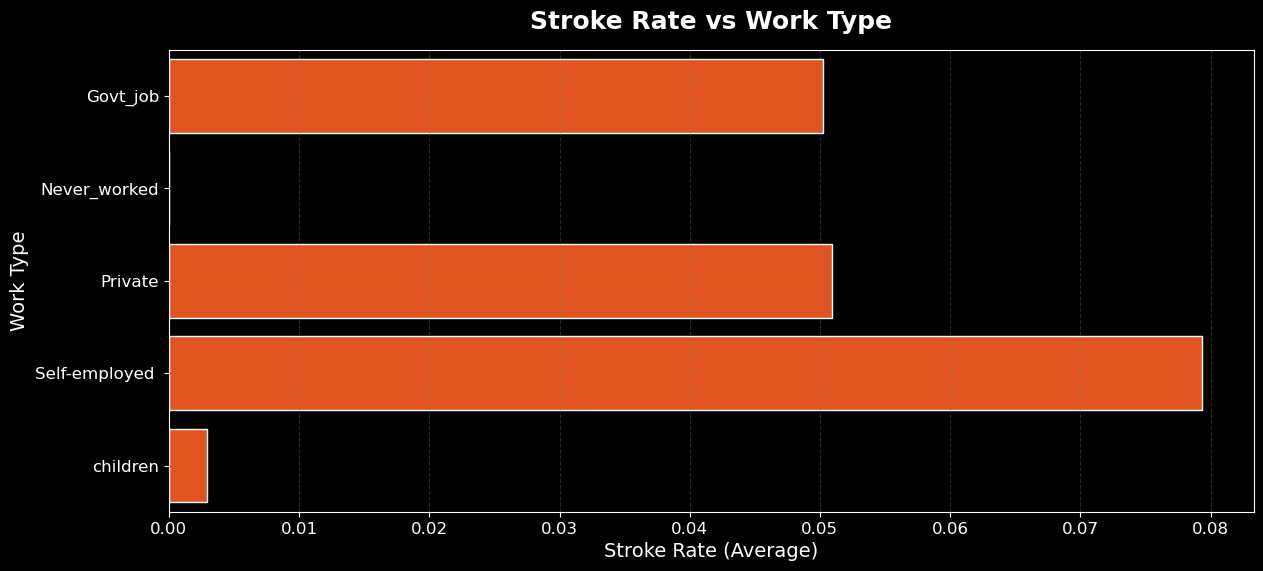

In [115]:
plt.figure(figsize=(14, 6))  
plt.style.use('dark_background')

sns.barplot(data=stroke_work, y='work_type',
            x='stroke_rate', color='#FF4500', edgecolor='white')  

plt.title('Stroke Rate vs Work Type', 
          fontsize=18, fontweight='bold', pad=15, color='white')
plt.xlabel('Stroke Rate (Average)', fontsize=14, color='white')
plt.ylabel('Work Type', fontsize=14, color='white')

plt.grid(axis='x', color='gray', linestyle='--', alpha=0.3)  

plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

plt.show()


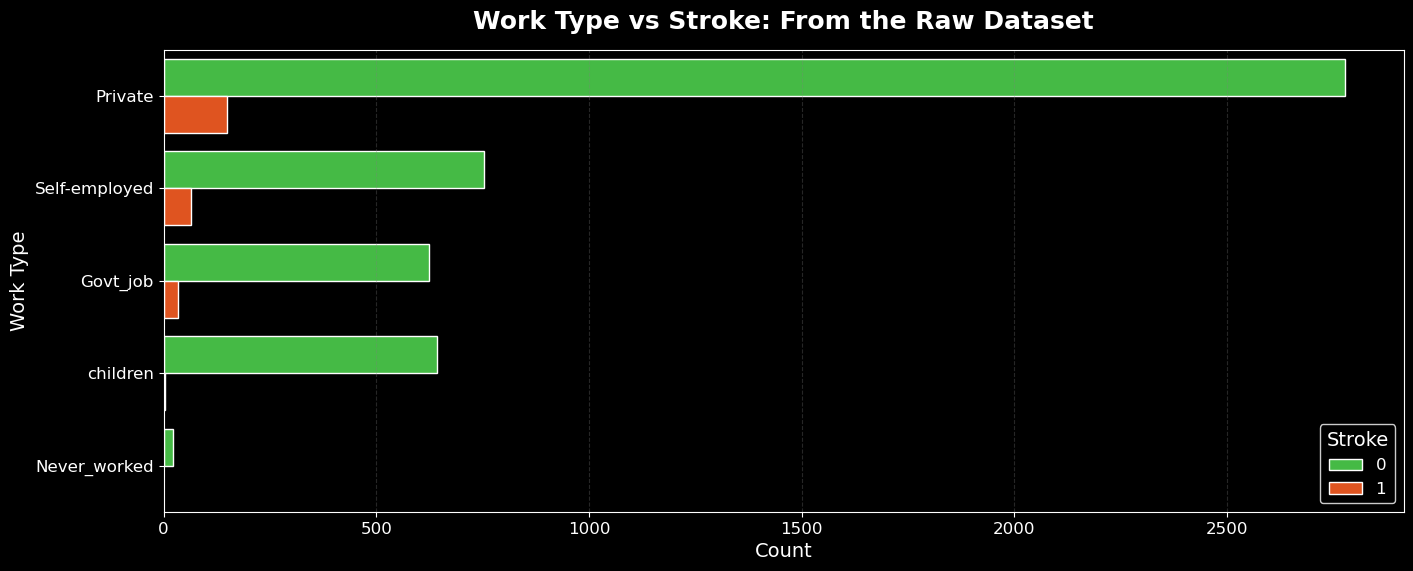

In [116]:
plt.figure(figsize=(16, 6))  
plt.style.use('dark_background')

sns.countplot(data=health, y='Work Type',
              palette=['#32CD32', '#FF4500'], hue='Stroke',
              edgecolor='white')  

plt.title("Work Type vs Stroke: From the Raw Dataset", 
          fontsize=18, fontweight='bold', pad=15, color='white')
plt.xlabel('Count', fontsize=14, color='white')
plt.ylabel('Work Type', fontsize=14, color='white')

plt.grid(axis='x', color='gray', linestyle='--', alpha=0.3)  

plt.legend(title='Stroke', fontsize=12, title_fontsize=14, loc='lower right',
           facecolor='black', edgecolor='white')

plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

plt.show()



## Q.Can Individuals Residence affect the rate of stroke?

In [120]:
# lets check the count of residence type from the raw dataset
health['Residence Type'].value_counts().reset_index()

,Residence Type,count
0,Urban,2573
1,Rural,2494


In [122]:
# Since there are more individuals who live in the urban areas in the dataset,
# we will calculate the stroke rate as an average across each Residence_type to account for this imbalance 
 
stroke_rate_residence = health.groupby('Residence Type')['Stroke'].mean()
stroke_rate_residence

Residence Type
Rural    0.045710
Urban    0.052468
Name: Stroke, dtype: float64

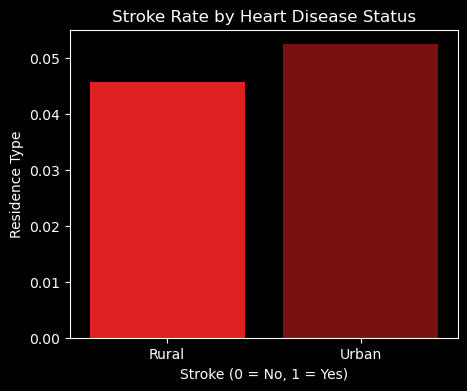

In [124]:
# Plot stroke rate by heart disease status
plt.figure(figsize=(5, 4))
sns.barplot(x=stroke_rate_residence.index,
            y=stroke_rate_residence.values,
            palette =['#FF0000','#8B0000'])
plt.title('Stroke Rate by Heart Disease Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Residence Type')
plt.show()

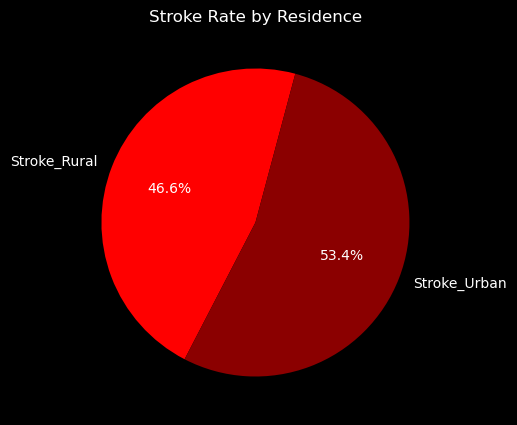

In [126]:
# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(stroke_rate_residence, labels= ['Stroke_Rural', 'Stroke_Urban'], 
        autopct='%1.1f%%', startangle=75,
        colors = ['#FF0000','#8B0000'], explode=[0, 0.0])
plt.title('Stroke Rate by Residence')
plt.show();

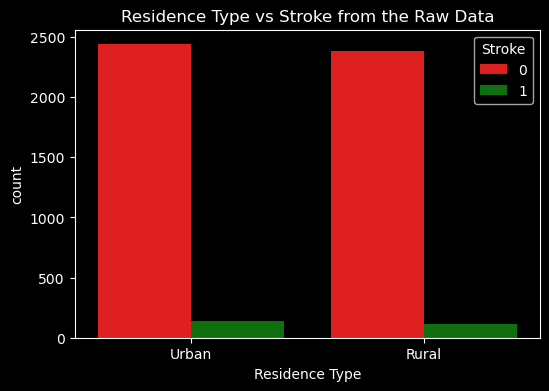

In [128]:
# Heart Disease vs Stroke
plt.figure(figsize=(6, 4))
sns.countplot(data= health, x='Residence Type', 
              palette = ['red', 'green'], hue = 'Stroke')
plt.title("Residence Type vs Stroke from the Raw Data")
plt.show()

## Q.Can Glucose Level affect the rate of stroke?

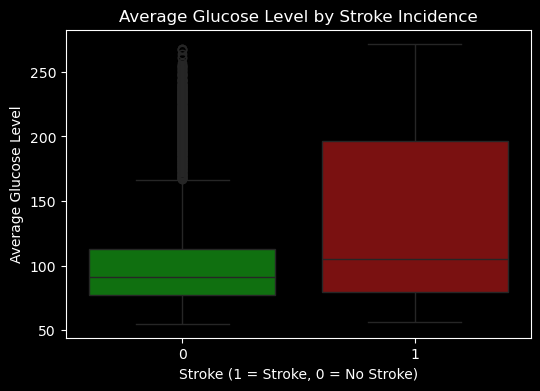

In [131]:
# plot a box plot to show relationship between stroke and average glucose level
plt.figure(figsize=(6, 4))
sns.boxplot(x='Stroke', y='Average Glucose Level', data=health, palette=['green','#8B0000'])
plt.title("Average Glucose Level by Stroke Incidence")
plt.xlabel("Stroke (1 = Stroke, 0 = No Stroke)")
plt.ylabel("Average Glucose Level")
plt.show()

## Q.Can age and average glucose level affect rate of stroke?

In [134]:
mean_glucose = health['Average Glucose Level'].mean()
mean_glucose

106.24159265837774

In [136]:
mean_age = health['Age'].mean()
mean_age

43.58200118413262

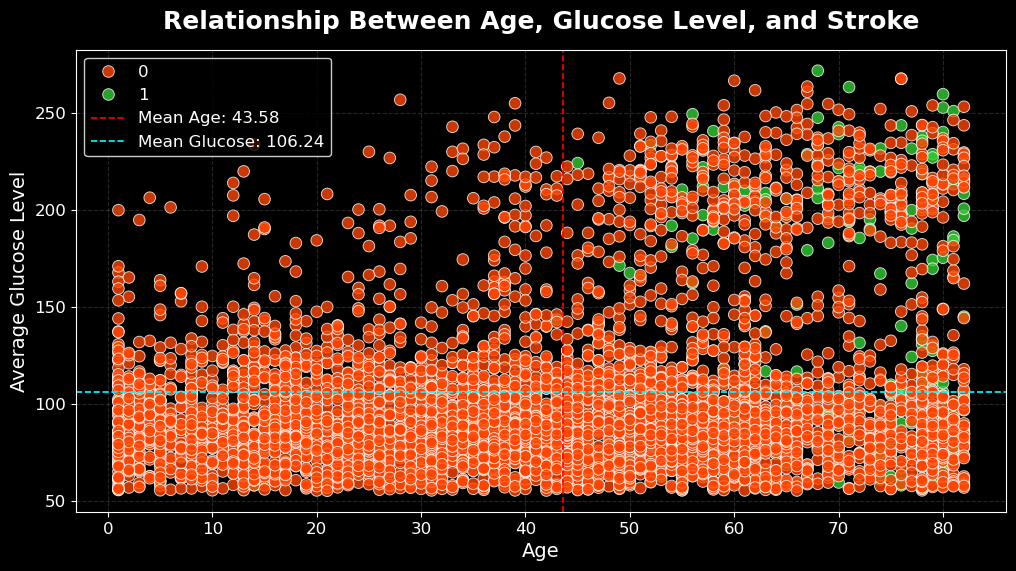

In [138]:
plt.figure(figsize=(12, 6))  
plt.style.use('dark_background')

sns.scatterplot(x='Age', y='Average Glucose Level',
                hue='Stroke', data=health,
                palette=['#FF4500', '#32CD32'],  
                s=70, alpha=0.8, edgecolor='white')  

plt.axvline(mean_age, color='red', linestyle='--', linewidth=1.2,
            label=f'Mean Age: {mean_age:.2f}')
plt.axhline(mean_glucose, color='cyan', linestyle='--', linewidth=1.2,
            label=f'Mean Glucose: {mean_glucose:.2f}')

plt.title('Relationship Between Age, Glucose Level, and Stroke', 
          fontsize=18, fontweight='bold', pad=15, color='white')
plt.xlabel('Age', fontsize=14, color='white')
plt.ylabel('Average Glucose Level', fontsize=14, color='white')

plt.grid(True, color='gray', linestyle='--', alpha=0.3) 

plt.legend(fontsize=12, facecolor='black', edgecolor='white')

plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

plt.show()


## Q.Can age bmi affect rate of stroke?

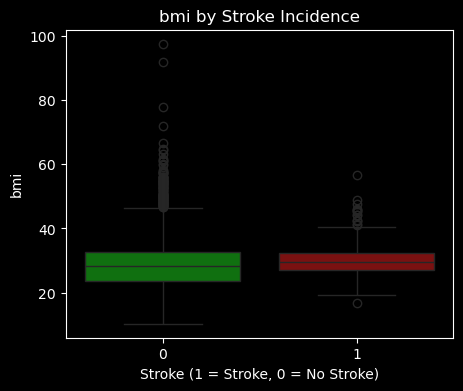

In [140]:
#  box plot showing the distribution of BMI for stroke and non-stroke cases
plt.figure(figsize=(5, 4))
sns.boxplot(x='Stroke', y='Body Mass Index', data=health, palette=['green','#8B0000'])
plt.title("bmi by Stroke Incidence")
plt.xlabel("Stroke (1 = Stroke, 0 = No Stroke)")
plt.ylabel("bmi")
plt.show()

## Q.Can age and bmi affect rate of stroke?

In [144]:
mean_bmi = health['Body Mass Index'].mean()
mean_bmi

28.963252417604103

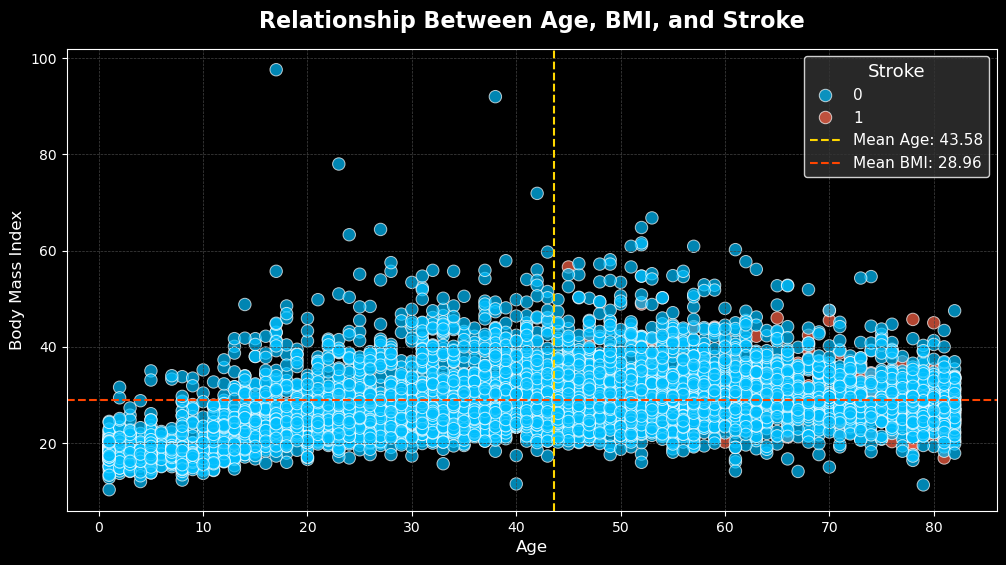

In [146]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x='Age', y='Body Mass Index',
                hue='Stroke', data=health,
                palette={0: '#00BFFF', 1: '#FF6347'},
                s=80, alpha=0.7, edgecolors='white')

plt.axvline(mean_age, color='#FFD700', linestyle='--', linewidth=1.5,
            label=f'Mean Age: {mean_age:.2f}')
plt.axhline(mean_bmi, color='#FF4500', linestyle='--', linewidth=1.5, 
            label=f'Mean BMI: {mean_bmi:.2f}')

plt.title('Relationship Between Age, BMI, and Stroke', fontsize=16, fontweight='bold', pad=15, color='white')
plt.xlabel('Age', fontsize=12, color='white')
plt.ylabel('Body Mass Index', fontsize=12, color='white')

plt.legend(title='Stroke', title_fontsize='13', fontsize='11',
           frameon=True, facecolor='#333', edgecolor='white')

plt.grid(color='#444', linestyle='--', linewidth=0.5)

plt.show()

In [147]:
health.to_csv('health_data.csv', index=False)
